
# Authorship Attribution for Ancient Greek Literature
## Table of contents
<ol style='list-style-type: upper-roman'>
    <li>
        <a href='#introduction'>Introduction</a>
        <ul>
            <li><a href='#problem_area'>Problem Area</a></li>
            <li><a href='#objectives'>Objectives</a></li>
            <li><a href='#dataset'>Dataset</a></li>
            <li><a href='#evaluation_methodology'>Evaluation Methodology</a></li>
        </ul>
    </li>
    <li>
        <a href='#implement_link'>Implementation</a></li>
         <ul>
            <li><a href='#coding_style_link'>Coding Style</a></li>
            <li><a href='#install_link'>Install Packages</a></li>
            <li><a href='#load_dataset_link'>Load Dataset</a></li>
            <li><a href='#preprocessing_link'>Preprocessing</a></li>
            <li><a href='#baseline_performance_link'>Baseline Performance</a></li>
            <li><a href='#classification_approach_link'>Classification Approach</a></li>
            <li><a href='#models_training_link'>Models Training</a></li>
            <li><a href='#prediction_link'>Prediction of Contested texts</a></li>
        </ul>
    <li><a href='#conclusions'>Conclusions</a>
        <ul>
            <li><a href='#evaluation'>Evaluation</a></li>
            <li><a href='#discussion_link'>Discussion</a></li>
            <li><a href='#future_work_link'>Future Work</a></li>
            <li><a href='#summary_link'>Summary</a></li>
        </ul>
    </li>
     <li><a href='#reference'>Reference</a>
         <ul>
            <li><a href='#data_source'>Dataset Source</a></li>
        </ul>
    </li>
</ol>

<!-- 1. [Introduction](#introduction)
    1. [Problem Area](#problem_area)
    1. [evaluation_methodology](#objectives)
    1. [Dataset](#dataset)
    1. [Evaluation Methodology](#evaluation_methodology)
1. [Implementation](#implement_link)
    1. [Install Packages](#install_link)
    1. [Load Dataset](#load_dataset_link)
    1. [Preprocessing](#preprocessing_link)
        1. [Lemmatization](#lemmatization_link)
        1. [Tokenization](#tokenization_link)
        1. [Stopwords Removal](#stopwords_link)
        1. [Undersampling and Oversampling](#sampling_link)
    1. [Baseline Performance](#preprocessing_link)
    1. [Classification Approach](#preprocessing_link)
    1. [Coding Style](#preprocessing_link)
1. [Conclusions](#get-data)
    1. [Evaulation](#preprocessing_link)
    1. [Discussion](#preprocessing_link)
    1. [Future Work](#preprocessing_link)
    1. [Summary](#preprocessing_link) -->


## Introduction  <a name="introduction"></a>
### Problem Area <a name="problem_area"></a>
Authorship attribution  has been a long-standing problem in the field of Ancient Greek literature study. Scholars have made a lot of effort in determining the genuine authorship of anonousy works, and giving answer to literatures of debated authorship. However, authorship attribution can be seen as a kind of text classification using statistics method, in which the authors are the categories to which each text is to be classified.

Statistical analysis of texts for author determination starts in in the late nineteenth century with the works of Mendenhall and Mascol. Computerized analysis of lexical features for authorship determination, however, shows its potential when Mosteller and Wallace applied Naive Bayes model, by analysing vairous lexical features, to determine the authorship of Federalist Papers in 1964. 

Currently, there are two approaches for lexical-based text-classification, as Stamatatos suggests in 2001. The first method is to measure the richness of vocabulary of authors. Another is based on the occurrence of individual words.

In this study, we made attempts to address this issue by using two machine learning model: Navie Bayes and Random Forest, with feature extraction method based on the occurrence of words.

### Objective <a name="objectives"></a>
This study aims to address the authorship attribution problems in Greek Literature. We would first train a model using works with known authorship, and thereby try to give from the persepective of computational linguistic answers to the authorship of contested Greek works. 

### Dataset <a name="dataset"></a>
We select 77 works from fourteen ancient Greek authors that ranged from 8th BCE to 3rd CE. The topics covered include religons, philosophy, myth, history, drama, while the genres include poetry, prose, epic, comedy, tragedy, history and biography. The corpus are represented as plain text in .txt format. The dataset was obtained from Wikisource and Project Gutenberg. A list of data source is included in the `Reference` section.

### Evaluation methodology <a name="evaluation_methodology"></a>
We use Precision, Recall, F1-score and Accuracy to meausre the performance of our model. However, Recall and accuracy are considered as the most important measurements in this study.

**Precision** measures how many works are correctly attribute to a particular authors. In other words, if an author scores 100% in precision, this means no texts are wrongly attributed to him/her.

**Recall** is an important measurement in this study, since it indicates how well our model predicts the authorship for a particular author. For example, if an author, say Plato, has 50% recall, this means our model has wrongly attribute his works to others.

**F1-score** considers both precision and recall. The higher the F1-score, the better the model performs.

**Accuracy** simply measures how many works are correctly attributed. The higher the score, the better the performance of the model. However, it might be not an effective indicator when the data is inbalance. For example, if there were 100 texts in the corpus, 90 of them belongs to Plato, while 10 belongs to Aristotle, the model could achieve 90% accuracy by simply labeling all texts as Plato.
### Result
For our model, TF-IDF measurement is used as the representation of corpus. The Navie Bayes model achieves 77% accuracy in authorship attribution by using, while the Random Forest model achieves 91% accuracy.

## II. Implementation <a name="implement_link"></a>

### Coding Style
In this study, all `methods` are named in lowercase letters, starting with a verb describing its action, and the name indicating its function. For exmple, `show_corpus_size` indicates this method would show the size of the corpus. Each method has comments describing what it does.

`Variables` are named in lowercase and with meaningful name so that the reader would know what data or object they represents. For exmple, `train_data` indicates this contains the data for training instead of testing.

All code contains necessary indentation, as it is required by the Python complier.

### Install Package  <a name="install_link"></a>
Firstly we install the required packages, and download the necessary data from Classical Language Tookit (CLTK) before the Greek lemmatizer and tokenizer could be used.

In [ ]:
pip install cltk nltk numpy pandas

In [ ]:
## Get data from CLTK
import tqdm as notebook_tqdm
from cltk.data.fetch import FetchCorpus
corpus_downloader = FetchCorpus(language="grc")

### Load Dataset <a name="load_dataset_link"></a>
We need to load the corpus stored locally before preprocessing. The dataset is represented in plain text and stored in `.txt` format. The dataset is converted into a `dict` data structure, with keys representing the authors' names and the values representing a list of their works.

Corpus Data Structure:

corpus = \{  
    &nbsp;&nbsp; 'author 1'：\[ work1, work2, work3 ...\],  
    &nbsp;&nbsp; 'author 2'：\[ work1, work2, work3 ...\],  
    &nbsp;&nbsp; 'author 3'：\[ work1, work2, work3 ...\],  
    &nbsp;&nbsp; ...  
\}  

In [2]:
import os
import textwrap
import cltk
from tabulate import tabulate

# Define the function of loading data
def get_corpus_dict_from_dir(path):
    files = os.listdir('./raw text')
    corpus_dict = {}
    for file in files:
        if '.txt' in file:
            author = file[:file.find('-')-1].strip()
            with open(path+'/'+file,'r',encoding='utf-8') as f:
                if corpus_dict.get(author) is None:
                    corpus_dict[author] = []
                corpus_dict[author].append(f.read())
    return corpus_dict

# Define the function of showing the size of the data
def show_corpus_size(corpus):
    table_data = []
    table_headers = ['Author','Num of Texts']
    for author,docs in corpus.items():
        table_data.append((author,len(docs)))
    
    total_size = len([work for works in corpus.values() for work in works])
    print(tabulate(table_data,headers=table_headers))
    print(tabulate([('Total',total_size)],headers=[' '*15,' '*13]))

# Load data into a dictionary
raw_copus = get_corpus_dict_from_dir('./raw text')

# Show how many works each author has
show_corpus_size(raw_copus)

/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Author               Num of Texts
-----------------  --------------
Pindar                          4
Epicurus                        2
Aeschylus                       6
Pausanias                       1
Plato                           8
Xenophon                       14
Euripides                      14
Hesiod                          3
Aristotle                       8
Aristophanes                    8
Homer                           2
Saint John                      4
Luke                            2
Diogenes Laërtius               1

-----------------  ---------------
Total                           77


### Segementation of text
A work in the copus presents a full publication. However, contested works often survives in fragments in Greek literature. Therefore, it is desired  that our model would be able to predict the authorship from a fragment of works. 

In order to give the model this capability, we divide works in the dataset into short fragments. However, we should be courious not to segement the works too small, since it is very unlikely to determine the authorship of a small paragraph. The writting style would not be obvious and work frequency distribution would not give insights to the authorship given the small size of paragraph. In this study, the size of a fragment is set to `5000` characters long. 

In [3]:
import textwrap

# Define the function for splitting the corpus
def segement_corpus(corpus,chunk_size):
    corpus_segemented = {}
    for author,docs in corpus.items():
        for doc in docs:
            if corpus_segemented.get(author) is None:
                corpus_segemented[author] = []
            corpus_segemented[author] += textwrap.wrap(doc,chunk_size)
    return corpus_segemented

# Split each works into smaller fragments
corpus = segement_corpus(raw_copus,chunk_size=5000)
show_corpus_size(corpus)

Author               Num of Texts
-----------------  --------------
Pindar                         30
Epicurus                        4
Aeschylus                      46
Pausanias                     234
Plato                         394
Xenophon                      404
Euripides                     164
Hesiod                         24
Aristotle                     333
Aristophanes                  116
Homer                         261
Saint John                     24
Luke                           51
Diogenes Laërtius             144

-----------------  ---------------
Total                         2229


In [4]:
# Show an excerpt of text
print('\nExample: A fragment of Epicurus\' work\n',corpus['Epicurus'][0][:3000])


Example: A fragment of Epicurus' work
 Κύριαι Δόξαι                                           Επίκουρος      εξάχθηκε από τη Βικιθήκη την 9 Ιουνίου 2022      Κύριαι Δόξαι  Συγγραφέας: Επίκουρος      1 Τὸ μακάριον καὶ ἄφθαρτον οὔτε αὐτὸ πράγματα ἔχει οὔτε ἄλλῳ παρέχει· ὥστε οὔτε ὀργαῖς οὔτε χάρισι συνέχεται· ἐν ἀσθενεῖ γὰρ πᾶν τὸ τοιοῦτον. (ἐν ἄλλοις δέ φησι τοὺς θεοὺς λόγῳ θεωρητούς͵ οὓς μὲν κατ΄ ἀριθμὸν ὑφεστῶτας͵ οὓς δὲ κατὰ ὁμοείδειαν͵ ἐκ τῆς συνεχοῦς ἐπιῤῥύσεως τῶν ὁμοίων εἰδώλων ἐπὶ τὸ αὐτὸ ἀποτετελεσμένων͵ ἀνθρωποειδεῖς.)  2 Ὁ θάνατος οὐδὲν πρὸς ἡμᾶς· τὸ γὰρ διαλυθὲν ἀναισθητεῖ͵ τὸ δ΄ ἀναισθητοῦν οὐδὲν πρὸς ἡμᾶς.  3 Ὅρος τοῦ μεγέθους τῶν ἡδονῶν ἡ παντὸς τοῦ ἀλγοῦντος ὑπεξαίρεσις. ὅπου δ΄ ἂν τὸ ἡδόμενον ἐνῇ͵ καθ΄ ὃν ἂν χρόνον ᾖ͵ οὐκ ἔστι τὸ ἀλγοῦν ἢ λυπούμενον ἢ τὸ συναμφότερον.  4 Οὐ χρονίζει τὸ ἀλγοῦν συνεχῶς ἐν τῇ σαρκί͵ ἀλλὰ τὸ μὲν ἄκρον τὸν ἐλάχιστον χρόνον πάρεστι͵ τὸ δὲ μόνον ὑπερτεῖνον τὸ ἡδόμενον κατὰ σάρκα οὐ πολλὰς ἡμέρας συμβαίνει· αἱ δὲ πολυχρόνιοι τῶν ἀῤῥωστιῶν πλεο

### Preprocessing <a name="preprocessing_link"></a>

#### Lemmatization <a name='lemmatization_link'></a>
We would use the Lemmatizer supported by the CLTK (The Classical Language Toolkit) library to lemmatize the words in the corpus before it is processed into the model. We define a function called `greek_lemmatizer(wordprint('\nExample: A fragment of Epicurus\' work\n',corpus['Epicurus'][0][:3000]))` that would perform lemmatization on a single word

In [5]:
# Import libraries
from cltk.lemmatize.grc import GreekBackoffLemmatizer
from cltk.alphabet.text_normalization import cltk_normalize
lemmatizer = GreekBackoffLemmatizer()

# Define the Lemmatization function
def greek_lemmatizer(word):
    return lemmatizer.lemmatize([cltk_normalize(word)])[0][1]

# Example
print('Example: \n The Greek word ᾠκοδομήσατο is lemmatized as',greek_lemmatizer('ᾠκοδομήσατο'))

Example: 
 The Greek word ᾠκοδομήσατο is lemmatized as οἰκοδομέω


#### Tokenization <a name='tokenization_link'></a>
The function `greek_tokenizer(text)` tokenizes the Greek corpus. This function is a wrapper of NLTK tokenizer for Greek language, with speical treatment for words in apocopic form. 

Stopwords in apocopic form, with which the vowel at the end of a word is removed, need extra attentions in the tokenization process so that they could be correctly discarded during stopwords removal. 

For example, "ἀλλά" (but) in the ancient Greek langauge often appears as "ἀλλ’", where the vowel "ά" is replaced by the apostrophe "’". This results in the incorrect tokenization that "ἀλλ’" is splited into two different tokens, "ἀλλ" and "’", instead of a single word "ἀλλ’".

In [6]:
import nltk

# Define the function for tokenization of Greek language
def greek_tokenizer(text):
    # Handling the apocopic form by replacing words in apocopic form by speical markers, 
    # which would later be substituted back to the original words
    processed_text = text.replace('ἀλλ’','tk_1')
    processed_text = processed_text.replace('ἀλλ\'','tk_1')
    
    processed_text = processed_text.replace('δ’','tk_2')
    processed_text = processed_text.replace('δ\'','tk_2')

    # Tokenization with NLTK's library
    words = nltk.word_tokenize(processed_text,language='greek')
    
    # Substitution for the original words
    for i in range(len(words)):
        if words[i] == 'tk_1':
            words[i] ='ἀλλ’'
            continue
        if words[i] == 'tk_2':
            words[i] ='δ’'
            continue
    return words

# Example
print('Example: Tokenize and Lemmatize the excerpt of Plato\'s works\n',corpus['Plato'][0][200:250])
print('Tokenized words:',greek_tokenizer(corpus['Plato'][0][200:250]))

Example: Tokenize and Lemmatize the excerpt of Plato's works
 βουλόμενος θεάσασθαι τίνα τρόπον ποιήσουσιν ἅτε νῦ
Tokenized words: ['βουλόμενος', 'θεάσασθαι', 'τίνα', 'τρόπον', 'ποιήσουσιν', 'ἅτε', 'νῦ']


#### Lemmatizer-Tokenizer
We need a function that could perform both lemmatization and tokenization at once. This function `greek_lemmatizer_tokenizer` would be passed into the TF-IDF Vectorizer to make representation of the corpus before training.

In [7]:
# Define the function that perform lemmatization and tokenization at once
def greek_lemmatizer_tokenizer(text):
    tokenized_words = greek_tokenizer(text)
    lemmatized_words =  [lemmatizer.lemmatize([word])[0][1] for word in tokenized_words]
    return lemmatized_words

# Example
print('Example:\n Tokenize and Lemmatize the excerpt of Plato\'s works\n',corpus['Plato'][0][180:230])
print('Result:',greek_lemmatizer_tokenizer(corpus['Plato'][0][180:230]))

Example:
 Tokenize and Lemmatize the excerpt of Plato's works
  καὶ ἅμα τὴν ἑορτὴν βουλόμενος θεάσασθαι τίνα τρόπ
Result: ['καί', 'ἅμα', 'ὁ', 'ἑορτή', 'βούλομαι', 'θεάω', 'τίς', 'τρόπ']


#### Stopwords Removal <a name='stopwords_link'></a>
We need to remove the stopwords from the copus in order to improve the performance of our model. Here we use the CLTK's stopwords list for Greek, while adding extra words, such as 'all' or 'I speak', which could help improve the performance of the model when removed.

In [8]:
# Make use of CLTK's stopwords list
grc_stoplist = cltk.stops.grc.STOPS

# Adding extra stopwords
grc_stoplist.extend(['να','και','το','τα','θα','τον','που','την','μου','τη','από','για',
                    'κι','με','εις','του','είναι','των','της','ἦν','τους','τοῦτο','ταῦτα','ἐγώ',
                    'δ\'','δ᾽','δ’','σου','ἀλλ᾽','ἀλλ’','ἀλλά','ότι','δε','ο','η','ᾖ','ή','αὐτοῦ','φημί','λέγω','εἶπον','πᾶς''ἔχω','πολύς','ἐπεί','ποιέω','γ᾽',
                     'Διότι','μιν','πᾶς'])

# Lemmatize stopwords
grc_stoplist = [greek_lemmatizer(stop) for stop in grc_stoplist]

#### Remove numbers and puncutations

Remove numbers and puncutations could also help build a better model, since they are most of times irrelevent to the linguistic features of the corpus.

In [9]:
import re
for author in corpus.keys():
    for i in range(len(corpus[author])):
        # Remove numbers
        corpus[author][i] = re.sub('[0-9]','',corpus[author][i])
        # Remove puncutations
        corpus[author][i] = re.sub("[\\[\\]!._,'@?\\\:;\\\(\\)\\%\\—\\{\\}\\*\\<\\>\\--\\``\\&\\·\\«\\»]",'',corpus[author][i])
        # Remove line breakers
        corpus[author][i] = re.sub("[\\n]",' ',corpus[author][i])
        # Remove special puncutations
        corpus[author][i] = re.sub("[\\`\\`]",'',corpus[author][i])
        

#### Normalization
Finally, normalization is applied to the corpus. All words are converted to lowercase. By normalization we could avoid having noise in the text where the words has the same meaning but were wrriten in different ways are considered wrongly to be different words.

In [10]:
# Convert all the text to lowercase
for author in corpus.keys():
    for i in range(len(corpus[author])):
        corpus[author][i] = corpus[author][i].lower()
print('Example: An excerpt of Plato\'s work, with all words in lowercase:')
print(corpus['Plato'][0][:100])

Example: An excerpt of Plato's work, with all words in lowercase:
πολιτεία  πολιτεία  συγγραφέας πλάτων  βιβλίο α πολιτείαβ→      σωκράτης γλαύκων   a σωκράτης κατέβη


#### Undersampling and Oversampling <a name='sampling_link'></a>
In statistic, undersampling and oversampling are useful techniques when the dataset is inbalance and as a result the predicting model is biased towords a particular category of data. In otherwords, some categoires of data are over-represented while some others are under-represented. For example, in our dataset, there are more than 400 texts from Xenophon, whereas ther are only 4 from Epicurus. Xenophon is overepresented, while Epicurus is underepresented. 

To avoid the undesired model resulted by the biased dataset, we need to reduce the number of texts from the overrepresented authors while increase the size of corpus for the underrepresented ones. 

In [11]:
show_corpus_size(corpus)

Author               Num of Texts
-----------------  --------------
Pindar                         30
Epicurus                        4
Aeschylus                      46
Pausanias                     234
Plato                         394
Xenophon                      404
Euripides                     164
Hesiod                         24
Aristotle                     333
Aristophanes                  116
Homer                         261
Saint John                     24
Luke                           51
Diogenes Laërtius             144

-----------------  ---------------
Total                         2229


##### Undersampling
There are different approaches to undersampling. The technique we used here is called **Random undersampling**, in which random samples are removed from the overrepresented categories. Other techniques include Cluster centroids in which a cluster of samples are replaced by the cluster centroids that are calculated using the K-means algorithm.

In [12]:
## Undersampling
import random
## Remove some samples from Plato's corpus
plato_corpus = corpus['Plato']
random.seed(1)
random.shuffle(plato_corpus)
corpus['Plato'] = plato_corpus[:250]

# Remove some from Aristotle's corpus
aristotle_corpus = corpus['Aristotle']
random.shuffle(aristotle_corpus)
corpus['Aristotle'] = aristotle_corpus[:250]

# Remove some from Aristotle's corpus
xenophon_corpus = corpus['Xenophon']
random.shuffle(xenophon_corpus)
corpus['Xenophon'] = xenophon_corpus[:250]

show_corpus_size(corpus)

Author               Num of Texts
-----------------  --------------
Pindar                         30
Epicurus                        4
Aeschylus                      46
Pausanias                     234
Plato                         250
Xenophon                      250
Euripides                     164
Hesiod                         24
Aristotle                     250
Aristophanes                  116
Homer                         261
Saint John                     24
Luke                           51
Diogenes Laërtius             144

-----------------  ---------------
Total                         1848


##### Oversampling
Oversampling is a method to increase the representing proportion for the minor categories. Traditionally it is done by collecting more data for the minor categories. However, since we cannot obtain more texts from antiquity than what survives today, we resolve to cloning the data of the underrepresented authors in order to increase the accuracy of the model.

It should be curious that oversampling often leads to overfitting of models. Therefore, extra attention must be taken when increasing the number of texts of the minor authors. We only clone 50% of texts from the original corpus of the underrepresented authors, and do not seek a complete balance of corpus between authors.

In [13]:
def oversampling(corpus,author):
    author_corpus = corpus[author]
    random.shuffle(author_corpus)
    corpus[author] = author_corpus + author_corpus[:int(len(author_corpus)/2)]

oversampling(corpus,'Saint John')
oversampling(corpus,'Luke')
oversampling(corpus,'Epicurus')
oversampling(corpus,'Aeschylus')
oversampling(corpus,'Pindar')

show_corpus_size(corpus)

Author               Num of Texts
-----------------  --------------
Pindar                         45
Epicurus                        6
Aeschylus                      69
Pausanias                     234
Plato                         250
Xenophon                      250
Euripides                     164
Hesiod                         24
Aristotle                     250
Aristophanes                  116
Homer                         261
Saint John                     36
Luke                           76
Diogenes Laërtius             144

-----------------  ---------------
Total                         1925


#### Labels for the target data

### Training Data and Target Data
In order to prepare the data for model training, we first transform the corpus into two parts: a list of texts and a list of corrresponding authors encoded as integers. After the transformation, we divide the dataset into `training data` and `testing data` in the 3:1 ratio.

In [14]:
# Get the author list from the corpus
authors = list(corpus.keys())

# Transform the data into a list of text and a list of authors encoded as integers.
all_train_data = []
all_target_data = []
for author,docs in corpus.items():
    for doc in docs:
        all_train_data.append(doc)
        all_target_data.append(authors.index(author))
print('There are ', len(all_train_data),' data')

There are  1925  data


After the transformation, we would assign 1/3 of data as the `training_data` and the remaining 1/3 as the `testing_data`. However, before dividing the dataset, we need to first rearrange the data randomly, so that the `target_data` would include texts from different authors.

In [15]:
# Rearrange the data randomly
from sklearn.utils import shuffle
all_train_data, all_target_data = shuffle(all_train_data, all_target_data, random_state=3)

In [16]:
# Divide the data into training set and testing set
train_data_boundary = int(len(all_train_data)/3 *2)
train_data = all_train_data[:train_data_boundary]
target_data = all_target_data[:train_data_boundary]
test_data = all_train_data[train_data_boundary:]
test_target_data=all_target_data[train_data_boundary:]

print('There are',len(train_data),'training data and',len(test_data),'testing data')

There are 1283 training data and 642 testing data


### Baseline Performance <a name='baseline_performance_link'></a>
Sarah Beller conducted a research in 2014 in which various machine learning models are used to learn linguistic features of 63 influential Greek texts with known authorship, and thereby used to make prediction of authorship of contested works. The best model they developed using Naive Bayes Classifier achieves 85.71% accuracy. This serves as our baseline peroformance.

### Classification approach <a name='classification_approach_link'></a>

In this study, we would use Navie Bayes model and Random Forest model for text classification, and compare their performance. 

#### Naive Bayes
Naive Bayes is one of the powerful approaches to text classification. Naive Bayes model is based on Bayes Rule. It is simple to understand and implement, yet is able to give acceptable accuracy. This model is fast and particualr suitable for high-demensional dataset, such as text, and is therefore a popular algorithm for task of text classification. 

In this study, Multinomial Naive Bayes model is used. Each word in the corpus is a feature decided by its TF-IDF value which measure the importance of a word in the corpus. 

However, Naive Bayes model assumes that each feature is independent of each others, while all the features are equally important. This might not be the case in representation of text, since in natural language words are related to give meanings and some words are less important than others. For example, particles typically convey less meaning than nouns. This would lead to the incomplete representation of the corpus, and therefore undermine the accuracy of the model.

#### Random Forests
Random forest classifier is an ensemble learning technique that creates a set of decision trees from a randomly selected samples from the training set, then combines the predicting result from each tree to give the prediction result.

Random forest is fast and able to give high accuracy. It is less prone to overfitting, which is useful in authorship attribution problem where we need to predict the text that is not in the training set. Moreover, Random orest model excels in handling missing data and unbalance dataset, which is often the case in authorship attribution problem in which works some authors processes significantly more surviving works than others.

### Models Training <a name='models_training_link'></a>

#### Navie Bayes Model

In [17]:
## Navie Bayes model training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Make the pipline using TF-IDF vectorizer to convert the corpus into numerical representation 
# and then apply Multinomial Naive Bayes model for training
nb_model = make_pipeline(TfidfVectorizer(tokenizer=greek_lemmatizer_tokenizer,stop_words=grc_stoplist,ngram_range=(1,3)), MultinomialNB())

# Training the model
nb_model.fit(train_data, target_data)

# Make Prediction
labels = nb_model.predict(test_data)

/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['̓', 'δ', 'διότι', 'εὐρύπορος', 'ἀλλ'] not in stop_words.
  warnings.warn(


#### Random Forest Model

In [18]:
## Random Forest model training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Make pipine for the training.
# Use TF-IDF vectorizer to convert the corpus into numerical representation.
# Then apply the Random Forest model for training
random_forest_model = make_pipeline(TfidfVectorizer(tokenizer=greek_lemmatizer_tokenizer,stop_words=grc_stoplist), RandomForestClassifier())

# Training the model
random_forest_model.fit(train_data, target_data)

# Make predictions
random_forest_labels = random_forest_model.predict(test_data)


/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['̓', 'δ', 'διότι', 'εὐρύπορος', 'ἀλλ'] not in stop_words.
  warnings.warn(


### Prediction of Contested Texts<a name='prediction_link'></a>
Upon training, We then use the model to predict the authorship of two contested Greek texts - `Homeric Hymns` and `Prometheus Bound`.

Homeric Hymns are a collection of 34 Greek poems that were directed as praise to gods in Greek religions, including Apollo,Demeter,Hermes, among other gods. This collection is in antiquity attributed to Homer. But modern scholars consider them not possible to be written during Homer's lifetime and of unknown authorship. However, both our models concur with the traditional view that it is likely wrriten by Homer. This result differs from Beller's research in which their models conclued that the Homeric Hymns are written either by Pindar or Hesiod.

Prometheus Bound is a play concerning the Titan Prometheus who give fire to humans and therefore suffers serve punishment from Zesus. The play reaches its climax in depicting the clash between the power of Zesus and the will of Prometheus. It was traditionally attributed to the famous Greek tragedien Aeschylus, but later was questioned for its authenticity in 1970s by Mark Griffith and Oliver Taplin on computational linguistic ground. Our Naive Bayes and Random Forest models both shows that it is likely to be written by Euripides. This result agrees with Beller's in which their Naive Bayes and KNN models both suggest the authorship by Euripides, while the Decision Tree model hints Aeschylus. Our models agree with the authoship questions arised in 1970s to Prometheus Bound and concurs with the result from Beller's. 

In [19]:
from tabulate import tabulate

# Get the author name from the encoding integers 
def get_author_by_index(authors,index):
    return authors[index]

# load text from file
def load_text(path):
    with open(path,'r') as f:
        text = f.read()
    return text

# remove all puncitations and numbers from a text
def clean_text(text):
    text = re.sub('[0-9]','',text)
    text = re.sub("[\\[\\]!._,'@?\\\:;\\\(\\)\\%\\—\\{\\}\\*\\<\\>\\--\\``\\&\\·\\«\\»]",'',text)
    text = re.sub("[\\n\\t]",' ',text)
    text = re.sub("[\\`\\`]",'',text)
    return text

# Given a model and a text, use the model to predict the authorship of the text
def predict_author(model,text):
    return get_author_by_index(authors,model.predict([text])[0])

# Show the prediction results from Random Forest and Navie Bayes model.
def show_predict_author_results_with_random_forest_and_navie_bayes(texts):
    random_forest_result = ['Random Forest']
    nb_result = ['Navie Bayes']
    headers = ['Model']
    for title,text in texts.items():
        random_forest_result.append(predict_author(random_forest_model,clean_text(text)))
        nb_result.append(predict_author(nb_model,clean_text(text)))
        headers.append(title)
    print(tabulate([random_forest_result,nb_result],headers=headers,tablefmt='fancy_grid'))

# load the text of Homeric Hymns
homeric_hymns = load_text('./Testing Data/Homeric Hymns.txt')
# load the text of Prometheus Bound
promeheus = load_text('./Testing Data/Prometheus Bound.txt')

# Show the predicted authorship for Prometheus Bound and Homeric Hymns 
show_predict_author_results_with_random_forest_and_navie_bayes({'Prometheus Bound':promeheus,'Homeric Hymns':homeric_hymns})

╒═══════════════╤════════════════════╤═════════════════╕
│ Model         │ Prometheus Bound   │ Homeric Hymns   │
╞═══════════════╪════════════════════╪═════════════════╡
│ Random Forest │ Euripides          │ Homer           │
├───────────────┼────────────────────┼─────────────────┤
│ Navie Bayes   │ Euripides          │ Homer           │
╘═══════════════╧════════════════════╧═════════════════╛


## Conclusions 

### Evaluation <a name='evaluation'></a>
An analysis of performance was conducted using `sklearn.metrics` library. The Naive Bayes model achieves 76% accuracy in predicting authorship. 

The recall (76% in weighted average) shows that our model is weak in predicting the authorship, espeically for the text from Pindar, Epicurus, Aristophanes, Aeschylus, Hesiod and Saint John and Saint Luke. For example, Saint John and Epicurus have none of their works were correctly attributed. This is probably due to the fact that they are underrepresented in the dataset. They have a small number of texts, compared to other authors such as Aristotle (Epicurus 6 vs. Aristotle 250). 

The precision scores (74% in weighted average) suggest that our Naive Bayes model mistakenly attribute many texts. For example, many texts are wrongly assigned to Euripides, Xenophon, Homer and Aristotle, as they have low scores in precision (0%, 58%, 68% and 73% respectively). The reason may be that they are overrpresented in the dataset. But overrepresenting is probably not the sole reason for the misattribution, as Plato, who is also overrepresented in the dataset, does not score low in precision (95%). 

The performance of our model is outshone by Baller's in accuracy (76% vs. 85.5%). However, we cannot compare our model with Baller's in terms of precision and recall, since the results from these metrics are not covered in the his paper.
 
Overall, the Naive Bayes model does not perform very well in terms of precision and recall.

#### Naive Bayes

/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

                   precision    recall  f1-score   support

           Pindar       0.00      0.00      0.00        19
         Epicurus       0.00      0.00      0.00         1
        Aeschylus       0.00      0.00      0.00        20
        Pausanias       0.97      1.00      0.99        77
            Plato       0.95      0.80      0.87        90
         Xenophon       0.58      0.98      0.73        81
        Euripides       0.68      0.86      0.76        49
           Hesiod       0.00      0.00      0.00        11
        Aristotle       0.73      0.99      0.84        83
     Aristophanes       1.00      0.53      0.69        40
            Homer       0.68      1.00      0.81        87
       Saint John       0.00      0.00      0.00         9
             Luke       1.00      0.42      0.59        26
Diogenes Laërtius       1.00      0.35      0.52        49

         accuracy                           0.76       642
        macro avg       0.54      0.49      0.48      

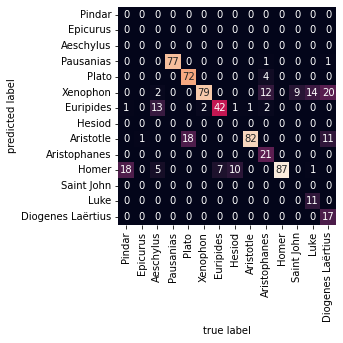

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Build the confusion matrix for the results from Naive Bayes model
mat = confusion_matrix(test_target_data, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=authors, yticklabels=authors)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Print the classification report(Precision, Recall, F1-score, Accuracy)
from sklearn.metrics import classification_report
print(classification_report(test_target_data, labels, target_names=authors))

#### Random Forest Model
The Random Forest model, however, achieves 92% accuracy in predicting authorship of texts. This result suggest that it surpasses the best model in Beller's paper in term of accurary.

With a better ability to deal with inbalance dataset than Naive Bayes, the Random Forest model correctly assigns works for authors who are underrepresented in the dataset. For example, Pindar, Saint John, and Saint Luke, who have relatively small corpus, have most of their works correctly assigned (with recall 53%, 100% and 100% respectively). However, none of the texts by Epicurus and Hesiod are correctly labeled. For Epicurus, it is likely because he only has the smallest number of texts in the dataset (Epicurus 6 v.s. Pindar 45)

/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

                   precision    recall  f1-score   support

           Pindar       1.00      0.53      0.69        19
         Epicurus       0.00      0.00      0.00         1
        Aeschylus       1.00      0.45      0.62        20
        Pausanias       0.99      1.00      0.99        77
            Plato       0.99      0.91      0.95        90
         Xenophon       0.96      1.00      0.98        81
        Euripides       0.70      0.98      0.81        49
           Hesiod       0.00      0.00      0.00        11
        Aristotle       0.86      0.99      0.92        83
     Aristophanes       1.00      0.93      0.96        40
            Homer       0.85      0.99      0.91        87
       Saint John       1.00      1.00      1.00         9
             Luke       1.00      1.00      1.00        26
Diogenes Laërtius       0.97      0.80      0.88        49

         accuracy                           0.91       642
        macro avg       0.81      0.75      0.77      

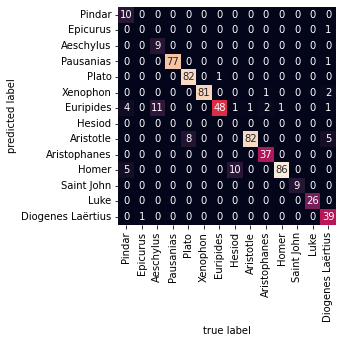

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Build the confusion matrix for the results from Random Forest model
mat = confusion_matrix(test_target_data, random_forest_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=authors, yticklabels=authors)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Print the classification report(Precision, Recall, F1-score, Accuracy)
from sklearn.metrics import classification_report
print(classification_report(test_target_data, random_forest_labels, target_names=authors))

#### Dicussion <a name='discussion_link'></a>

Although our best model archieve high accuracy in authorship prediction, it fails for some particular authors. For instance, Aeschylus scores low recall in both Random Forest and Naive Bayes models. This means that many, if not all, works of undebated authorship from Aeschylus are misattributed to others. This is evidenced in the confusion matrices. In other words, our models are inadequate at predicting the authorship for works of Aeschylus and therefore they are not capable to give solid answer to the authorship question about Prometheus Bound, and more generally, all works about Aeschylus.

However, even in the case of misattribution, both our models preserves the ability to recognize texts from different topics. For example, works wrongly labeled as Aristotle are mostly concerned with philosophy. Most of them are from Plato, Epicurus, who are famous Greek philosophers, or Diogenes Laërtius, a biographer of the Greek philosophers. Similarly, most of mislabeled texts from Aeschylus, a great Greek play writer, were assigned to Euripides, another Greek play writer. 

#### Future Work <a name='future_work_link'></a>
The next step for the authorship attributon project includes using feature selection that differs from TF-IDF. For example, in Beller's paper a combination of ten lexical features including words per line, syllables per word, prepositions, particles, and hapax legomena are used. Moreover, we will explore the vocabulary-richness method and its combination of the occurrence-based method. Finally, we will experiment with other machine learning models such as Support Vector Machine, and neural networks such as Long-Short-Term-Memory (LSTM) networks.

#### Summary <a name='summary_link'></a>
In this study, we experiment with two machine learning models, Naive Bayes and Random Forests, for authorship attribution of Greek classics. Our best model - Random Forestes - achieves 92% accuracy in authorship prediction. Moreover, we use our models to predict the authorship of contested works. Our models concur with the traditional view that Homeric Hymns should be attributed to Homer, while the prediction for Promtheus Bound agrees with the authenticity suspicion by the recent research in computational linguistics.

## Reference <a name='reference'> </a>
Britannica, T. Editors of Encyclopaedia (2008). Homeric Hymns. Encyclopedia Britannica. https://www.britannica.com/art/Homeric-Hymns


Britannica, T. Editors of Encyclopaedia (2011). Prometheus Bound. Encyclopedia Britannica. https://www.britannica.com/topic/Prometheus-Bound-play-by-Aeschylus

Beller, S.D., & Spicer, J. (2014). Attribution of Contested and Anonymous Ancient Greek Works.

Stamatatos, E., Fakotakis, N., & Kokkinakis, G.K. (2001). Computer-Based Authorship Attribution Without Lexical Measures. Computers and the Humanities, 35, 193-214.

Koppel, M., Schler, J., & Argamon, S.E. (2009). Computational methods in authorship attribution. J. Assoc. Inf. Sci. Technol., 60, 9-26.

### Dataset Source <a name='data_source'> </a>

Pindar. (2019, May 4). In Wikisource . Retrieved 04:36, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Pindar&oldid=9235755 

Luke the Evangelist. (2021, July 25). In Wikisource . Retrieved 07:02, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Luke_the_Evangelist&oldid=11531618

Diogenes Laërtius. (2021, November 9). In Wikisource . Retrieved 07:02, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Diogenes_La%C3%ABrtius&oldid=11867921

John the Evangelist. (2021, September 23). In Wikisource . Retrieved 07:02, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:John_the_Evangelist&oldid=11712410

Homer. (2022, April 30). In Wikisource . Retrieved 07:01, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Homer&oldid=12307141 

Hesiod. (2022, January 16). In Wikisource . Retrieved 07:01, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Hesiod&oldid=12064456

Euripides. (2022, February 17). In Wikisource . Retrieved 07:01, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Euripides&oldid=12155920

Xenophon. (2022, March 20). In Wikisource . Retrieved 07:00, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Xenophon&oldid=12230165

Pausanias. (2019, February 8). In Wikisource . Retrieved 07:00, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Pausanias&oldid=9094697

Epicurus. (2018, September 25). In Wikisource . Retrieved 07:00, June 24, 2022, from https://en.wikisource.org/w/index.php?title=Author:Epicurus&oldid=8835306

Meno Μένων by Plato. In Gutenberg . Retrieved 07:00, June 24, 2022, from https://www.gutenberg.org/ebooks/34881


Απολογία Σωκράτους Socrates' Apology, by Plato and Alexandros Moraitides. In Gutenberg.  Retrieved 07:00, June 24, 2022, from https://www.gutenberg.org/ebooks/39462

Πολιτεία, Τόμος 4 Republic Volume 4 (of 4), by Plato. In Gutenberg . Retrieved 07:00, June 24, 2022, from https://www.gutenberg.org/ebooks/39530

Όρνιθες The Birds, by Aristophanes. In Gutenberg . Retrieved 07:00, June 24, 2022, from 
https://www.gutenberg.org/ebooks/27315

Lysistrata Λυσιστράτη by Aristophanes. In Gutenberg . Retrieved 07:00, June 24, 2022, from 
https://www.gutenberg.org/ebooks/17814

Τίμαιος, Τόμος Timaeus, by Plato. In Gutenberg . Retrieved 07:00, June 24, 2022, from 
https://www.gutenberg.org/ebooks/35453

Hippias Ελάσσων, by Plato. In Gutenberg . Retrieved 07:00, June 24, 2022, from 
https://www.gutenberg.org/ebooks/34880

Ηθικά Νικομάχεια, Τόμος Πρώτος Nicomachean Ethics, Volume 1, by Aristotle. In Gutenberg . Retrieved 07:00, June 24, 2022, from 
https://www.gutenberg.org/ebooks/28626

Αθηναίων Πολιτεία The Constitution of the Athenians, by Aristotle. In Gutenberg . Retrieved 07:00, June 24, 2022, from 
https://www.gutenberg.org/ebooks/39963

Περί Ψυχής On the Soul, by Aristoteles. In Gutenberg . Retrieved 07:00, June 24, 2022, from 
https://www.gutenberg.org/ebooks/27816